In [1]:
# Python 3.8.10 64-bit
# Local Jupyter Notebook in VS Code

# Install requirements as listed in pyweka documentation.
# http://fracpete.github.io/python-weka-wrapper3/install.html#windows

# Oracle JDK required.
# https://www.oracle.com/java/technologies/downloads/#jdk17-windows

Install packages and libraries

In [2]:
%pip install numpy-1.21.5+vanilla-cp38-cp38-win_amd64.whl
%pip install javabridge-1.0.19-cp38-cp38-win_amd64.whl
%pip install matplotlib-3.5.1-cp38-cp38-win_amd64.whl

Processing c:\users\jc\desktop\onedrive - kennesaw state university\mscy\gra\datasets\numpy-1.21.5+vanilla-cp38-cp38-win_amd64.whl
numpy is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.
Processing c:\users\jc\desktop\onedrive - kennesaw state university\mscy\gra\datasets\javabridge-1.0.19-cp38-cp38-win_amd64.whl
javabridge is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.
Processing c:\users\jc\desktop\onedrive - kennesaw state university\mscy\gra\datasets\matplotlib-3.5.1-cp38-cp38-win_amd64.whl
matplotlib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install python-weka-wrapper3
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Install python packages typically used with weka. Add / Remove items as needed.

import os
#import zat
import glob
import tempfile
import itertools
import traceback
import numpy as np
import pandas as pd
import weka.core.jvm as jvm
import matplotlib.pyplot as plt
import weka.plot.classifiers as plot_cls
import plotly.graph_objects as go
import weka.plot.graph as graph
import weka.plot.graph as plot_graph
import weka.core.typeconv as typeconv
import weka.core.converters as converters
import plotly.graph_objects as go
import weka.plot.classifiers as plcls

from weka.filters import Filter
#from zat.log_to_dataframe import LogToDataFrame
#from zat.dataframe_to_matrix import DataFrameToMatrix
from weka.core.classes import from_commandline
from weka.core.classes import to_commandline
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.filters import Filter
from weka.classifiers import Evaluation
from weka.core.converters import Loader
from weka.core.classes import Random, from_commandline
from weka.classifiers import Classifier, SingleClassifierEnhancer, MultipleClassifiersCombiner, FilteredClassifier
from weka.classifiers import PredictionOutput, Kernel, KernelClassifier
from weka.experiments import SimpleCrossValidationExperiment, SimpleRandomSplitExperiment, Tester, ResultMatrix

Load data and create combined csv file

In [6]:
# Create a Pandas dataframe from network log using zat logtodataframe function 
# https://mcfp.felk.cvut.cz/publicDatasets/IoT-23-Dataset/IndividualScenarios/CTU-IoT-Malware-Capture-20-1/bro/

#log_to_df = LogToDataFrame()
#log_df = log_to_df.create_dataframe("conn.log.labeled")

# Print out the head of the dataframe
# log_df.head()

# Save dataframe to csv file

#log_df.to_csv("testzat.csv")

data_malware = pd.read_csv('datasetLegitimate33features.csv')
data_benign = pd.read_csv('datasetMalware33features.csv')
data_complete = pd.concat([data_malware, data_benign])
# data_complete.describe()
data_complete.to_csv("complete_MTAKDD19.csv")

In [7]:
#log_df.describe()

Start Java VM for algorithm library and load data

In [6]:
import weka.core.jvm as jvm
jvm.start(packages=True,max_heap_size="16g")

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


In [7]:
# Load csv file

from weka.core.converters import Loader

csv_loader = Loader(classname="weka.core.converters.CSVLoader")
csv_data = csv_loader.load_file("complete_MTAKDD19.csv")
csv_data.class_is_last()

csv_remove = Filter(classname="weka.filters.unsupervised.attribute.Remove", options=["-R", "1"])
csv_remove = Filter(classname="weka.filters.unsupervised.attribute.NumericToNominal", options=["-R", "last"])
csv_remove.inputformat(csv_data)
dataset = csv_remove.filter(csv_data)


In [8]:
# create plot function

def plot_confusion_matrix(cm, title):

  plt.gcf().clear()
  fig = plt.figure(1)
  classes = ['Class A', 'Class B']
  plt.imshow(cm, interpolation='none', cmap=plt.cm.Blues, alpha=0.3)
  plt.title(title)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  fmt = 'd'
  thresh = 155
  
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="black")
  plt.imshow
  plt.tight_layout()
  plt.ylabel('Actual')
  plt.xlabel('Predicted') 
  
  image = fig 
  display(image)
  plt.close(fig)

Decision Tree

In [9]:
# Build and run decision tree model

DT = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
DT.build_classifier(dataset)

DT_evl = Evaluation(dataset)
DT_evl.crossvalidate_model(DT, dataset, 10, Random(1))

print(DT_evl.summary())
print(DT_evl.class_details())


Correctly Classified Instances       64551               99.9954 %
Incorrectly Classified Instances         3                0.0046 %
Kappa statistic                          0.9999
Mean absolute error                      0.0001
Root mean squared error                  0.0068
Relative absolute error                  0.0125 %
Root relative squared error              1.3663 %
Total Number of Instances            64554     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1.000    0.000    1.000      1.000    1.000      1.000    1.000     1.000     0
                 1.000    0.000    1.000      1.000    1.000      1.000    1.000     1.000     1
Weighted Avg.    1.000    0.000    1.000      1.000    1.000      1.000    1.000     1.000     



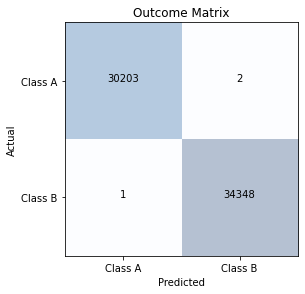

In [10]:
# Create array and print outcome matrix graphic

evl = DT_evl

DT_matrix = np.array([[int(evl.num_true_negatives(class_index=1)), int(evl.num_false_positives(class_index=1))],\
                      [int(evl.num_false_negatives(class_index=1)), int(evl.num_true_positives(class_index=1))]])
                      
plot_confusion_matrix(DT_matrix, "Outcome Matrix")


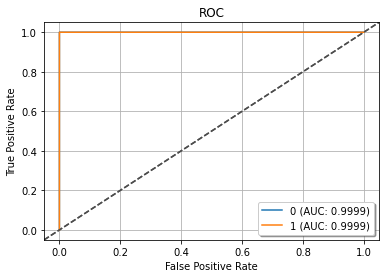

In [11]:
# Display ROC Curve

plcls.plot_roc(DT_evl, class_index=[0, 1], wait=True)

AdaBoost Decision Stump

In [167]:
# Build and run Decision Stump model with adaptive boosting ensemble algorithm 

B_DS_cmdline = 'weka.classifiers.meta.AdaBoostM1 -P 100 -S 1 -I 10 -W weka.classifiers.trees.DecisionStump'
B_DS_cls = from_commandline(B_DS_cmdline, classname="weka.classifiers.Classifier")
B_DS_cls.build_classifier(dataset)

B_DS_evl = Evaluation(dataset)
B_DS_evl.crossvalidate_model(B_DS_cls, dataset, 10, Random(1))

print(B_DS_evl.summary())
print(B_DS_evl.class_details())


Correctly Classified Instances       63053               97.6748 %
Incorrectly Classified Instances      1501                2.3252 %
Kappa statistic                          0.9532
Mean absolute error                      0.0367
Root mean squared error                  0.097 
Relative absolute error                  7.3735 %
Root relative squared error             19.4396 %
Total Number of Instances            64554     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.952    0.002    0.998      0.952    0.975      0.954    1.000     1.000     0
                 0.998    0.048    0.960      0.998    0.979      0.954    1.000     1.000     1
Weighted Avg.    0.977    0.026    0.978      0.977    0.977      0.954    1.000     1.000     



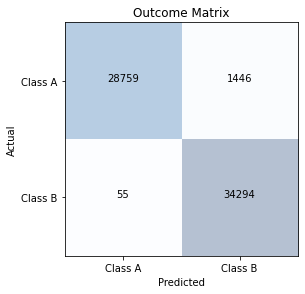

In [168]:
# Create array and print outcome matrix graphic

evl = B_DS_evl

DT_matrix = np.array([[int(evl.num_true_negatives(class_index=1)), int(evl.num_false_positives(class_index=1))],\
                      [int(evl.num_false_negatives(class_index=1)), int(evl.num_true_positives(class_index=1))]])
                      
plot_confusion_matrix(DT_matrix, "Outcome Matrix")

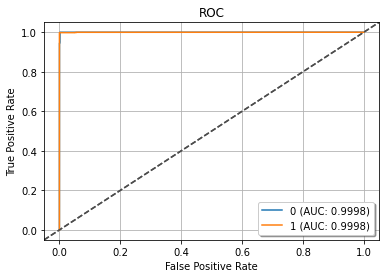

In [169]:
# Display ROC Curve

plcls.plot_roc(B_DS_evl, class_index=[0, 1], wait=True)

Naive Bayes

In [170]:
# Build and run Naive Bayes model

NB_cls = Classifier(classname="weka.classifiers.bayes.NaiveBayes")
NB_cls.build_classifier(dataset)

NB_evl = Evaluation(dataset)
NB_evl.crossvalidate_model(NB_cls, dataset, 10, Random(1))

print(NB_evl.summary())
print(NB_evl.class_details())


Correctly Classified Instances       49008               75.9178 %
Incorrectly Classified Instances     15546               24.0822 %
Kappa statistic                          0.5279
Mean absolute error                      0.2393
Root mean squared error                  0.4744
Relative absolute error                 48.0651 %
Root relative squared error             95.0675 %
Total Number of Instances            64554     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.945    0.404    0.673      0.945    0.786      0.568    0.926     0.934     0
                 0.596    0.055    0.925      0.596    0.725      0.568    0.926     0.912     1
Weighted Avg.    0.759    0.218    0.807      0.759    0.753      0.568    0.926     0.922     



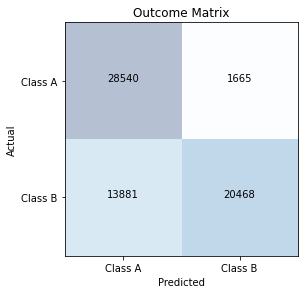

In [171]:
# Create array and print outcome matrix graphic

evl = NB_evl

DT_matrix = np.array([[int(evl.num_true_negatives(class_index=1)), int(evl.num_false_positives(class_index=1))],\
                      [int(evl.num_false_negatives(class_index=1)), int(evl.num_true_positives(class_index=1))]])
                      
plot_confusion_matrix(DT_matrix, "Outcome Matrix")

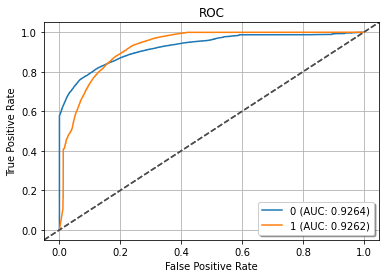

In [172]:
# Display ROC Curve

plcls.plot_roc(NB_evl, class_index=[0, 1], wait=True)

MLP Nueral Network

In [173]:
# Build and run MLP model

MLP_cls = Classifier(classname="weka.classifiers.functions.MLPClassifier")
MLP_cls.build_classifier(dataset)

MLP_evl = Evaluation(dataset)
MLP_evl.crossvalidate_model(MLP_cls, dataset, 10, Random(1))

print(MLP_evl.summary())
print(MLP_evl.class_details())


Correctly Classified Instances       63677               98.6414 %
Incorrectly Classified Instances       877                1.3586 %
Kappa statistic                          0.9727
Mean absolute error                      0.0255
Root mean squared error                  0.1125
Relative absolute error                  5.1152 %
Root relative squared error             22.5551 %
Total Number of Instances            64554     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.980    0.008    0.991      0.980    0.985      0.973    0.991     0.993     0
                 0.992    0.020    0.983      0.992    0.987      0.973    0.991     0.984     1
Weighted Avg.    0.986    0.014    0.986      0.986    0.986      0.973    0.991     0.988     



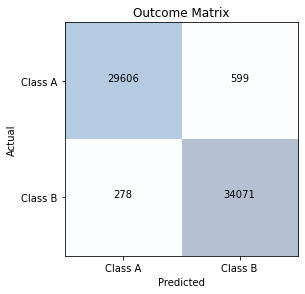

In [174]:
# Create array and print outcome matrix graphic

evl = MLP_evl

DT_matrix = np.array([[int(evl.num_true_negatives(class_index=1)), int(evl.num_false_positives(class_index=1))],\
                      [int(evl.num_false_negatives(class_index=1)), int(evl.num_true_positives(class_index=1))]])
                      
plot_confusion_matrix(DT_matrix, "Outcome Matrix")

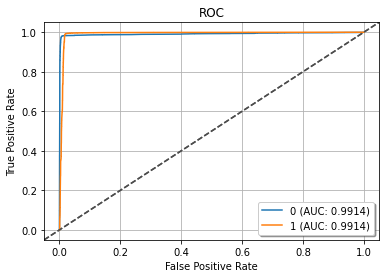

In [175]:
# Display ROC Curve

plcls.plot_roc(MLP_evl, class_index=[0, 1], wait=True)

Stochastic Gradient Descent

In [176]:
# Build and run SGD model

SGD = Classifier(classname="weka.classifiers.functions.SGD")
SGD.build_classifier(dataset)

SGD_evl = Evaluation(dataset)
SGD_evl.crossvalidate_model(SGD, dataset, 10, Random(1))

print(SGD_evl.summary())
print(SGD_evl.class_details())


Correctly Classified Instances       63170               97.8561 %
Incorrectly Classified Instances      1384                2.1439 %
Kappa statistic                          0.9569
Mean absolute error                      0.0214
Root mean squared error                  0.1464
Relative absolute error                  4.3056 %
Root relative squared error             29.3449 %
Total Number of Instances            64554     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.967    0.011    0.987      0.967    0.977      0.957    0.978     0.970     0
                 0.989    0.033    0.971      0.989    0.980      0.957    0.978     0.966     1
Weighted Avg.    0.979    0.023    0.979      0.979    0.979      0.957    0.978     0.968     



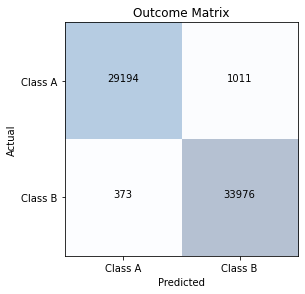

In [177]:
# Create array and print outcome matrix graphic

evl = SGD_evl

DT_matrix = np.array([[int(evl.num_true_negatives(class_index=1)), int(evl.num_false_positives(class_index=1))],\
                      [int(evl.num_false_negatives(class_index=1)), int(evl.num_true_positives(class_index=1))]])
                      
plot_confusion_matrix(DT_matrix, "Outcome Matrix")

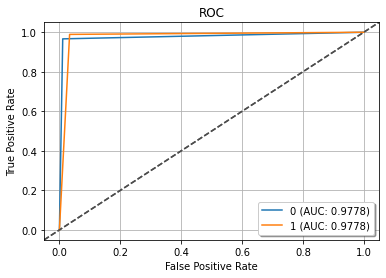

In [178]:
# Display ROC Curve

plcls.plot_roc(SGD_evl, class_index=[0, 1], wait=True)

KNN (K=1)

In [179]:
# Build and run KNN model

IBk = Classifier(classname="weka.classifiers.lazy.IBk", options=["-K","1"])
IBk.build_classifier(dataset)

IBk_evl = Evaluation(dataset)
IBk_evl.crossvalidate_model(IBk, dataset, 10, Random(1))

print(IBk_evl.summary())
print(IBk_evl.class_details())


Correctly Classified Instances       63910               99.0024 %
Incorrectly Classified Instances       644                0.9976 %
Kappa statistic                          0.98  
Mean absolute error                      0.01  
Root mean squared error                  0.0999
Relative absolute error                  2.0068 %
Root relative squared error             20.0171 %
Total Number of Instances            64554     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.991    0.011    0.988      0.991    0.989      0.980    0.990     0.984     0
                 0.989    0.009    0.992      0.989    0.991      0.980    0.990     0.989     1
Weighted Avg.    0.990    0.010    0.990      0.990    0.990      0.980    0.990     0.986     



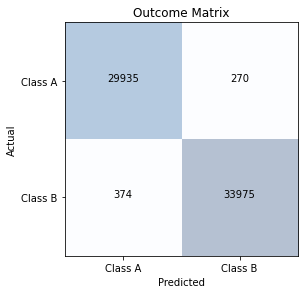

In [180]:
# Create array and print outcome matrix graphic

evl = IBk_evl

DT_matrix = np.array([[int(evl.num_true_negatives(class_index=1)), int(evl.num_false_positives(class_index=1))],\
                      [int(evl.num_false_negatives(class_index=1)), int(evl.num_true_positives(class_index=1))]])
                      
plot_confusion_matrix(DT_matrix, "Outcome Matrix")

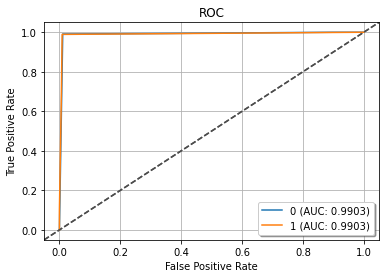

In [181]:
# Display ROC Curve

plcls.plot_roc(IBk_evl, class_index=[0, 1], wait=True)

Voting Feature Intervals

In [182]:
# Build and run voting feature interval model

VFI = Classifier(classname="weka.classifiers.misc.VFI")
VFI.build_classifier(dataset)

VFI_evl = Evaluation(dataset)
VFI_evl.crossvalidate_model(VFI, dataset, 10, Random(1))

print(VFI_evl.summary())
print(VFI_evl.class_details())


Correctly Classified Instances       53311               82.5836 %
Incorrectly Classified Instances     11243               17.4164 %
Kappa statistic                          0.6579
Mean absolute error                      0.2892
Root mean squared error                  0.3359
Relative absolute error                 58.0695 %
Root relative squared error             67.3166 %
Total Number of Instances            64554     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1.000    0.327    0.729      1.000    0.843      0.700    0.946     0.940     0
                 0.673    0.000    0.999      0.673    0.804      0.700    0.946     0.958     1
Weighted Avg.    0.826    0.153    0.873      0.826    0.822      0.700    0.946     0.949     



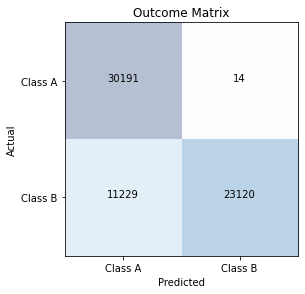

In [183]:
# Create array and print outcome matrix graphic

evl = VFI_evl

DT_matrix = np.array([[int(evl.num_true_negatives(class_index=1)), int(evl.num_false_positives(class_index=1))],\
                      [int(evl.num_false_negatives(class_index=1)), int(evl.num_true_positives(class_index=1))]])
                      
plot_confusion_matrix(DT_matrix, "Outcome Matrix")

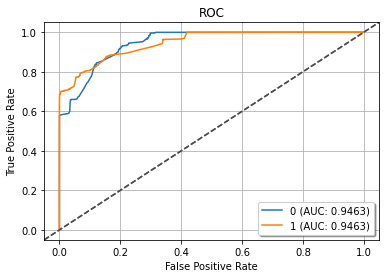

In [184]:
# Display ROC Curve

plcls.plot_roc(VFI_evl, class_index=[0, 1], wait=True)

Sequential Minimal Optimization SVM

In [185]:
# Build and run SMO SVM model

SMO = Classifier(classname="weka.classifiers.functions.SMO")
SMO.build_classifier(dataset)

SMO_evl = Evaluation(dataset)
SMO_evl.crossvalidate_model(SMO, dataset, 10, Random(1))

print(SMO_evl.summary())
print(SMO_evl.class_details())


Correctly Classified Instances       63117               97.774  %
Incorrectly Classified Instances      1437                2.226  %
Kappa statistic                          0.9552
Mean absolute error                      0.0223
Root mean squared error                  0.1492
Relative absolute error                  4.4705 %
Root relative squared error             29.9015 %
Total Number of Instances            64554     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.963    0.009    0.990      0.963    0.976      0.956    0.977     0.970     0
                 0.991    0.037    0.968      0.991    0.979      0.956    0.977     0.964     1
Weighted Avg.    0.978    0.024    0.978      0.978    0.978      0.956    0.977     0.967     



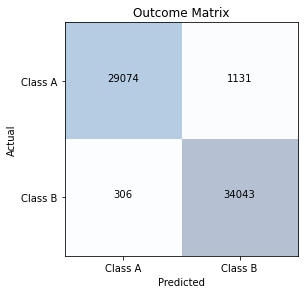

In [186]:
# Create array and print outcome matrix graphic

evl = SMO_evl

DT_matrix = np.array([[int(evl.num_true_negatives(class_index=1)), int(evl.num_false_positives(class_index=1))],\
                      [int(evl.num_false_negatives(class_index=1)), int(evl.num_true_positives(class_index=1))]])
                      
plot_confusion_matrix(DT_matrix, "Outcome Matrix")

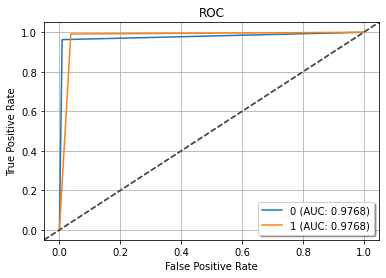

In [187]:
# Display ROC Curve

plcls.plot_roc(SMO_evl, class_index=[0, 1], wait=True)

Stop Java VM

In [188]:
# Stop JVM. May need to restart compute cluster or jupyter kernal if jvm restart is required.

jvm.stop()